<a href="https://colab.research.google.com/github/akankshabw/Chirp/blob/master/Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Exploratory Data Analysis***

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/UrbanSound8K.csv")

In [ ]:
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
sample = '/content/107090-1-0-0.wav'
data, sample_rate = librosa.load(sample)
ipd.Audio(data,rate=sample_rate)

In [ ]:
print(data)

[-0.00038127 -0.00053788 -0.00033227 ... -0.00080032 -0.0008806
  0.        ]


In [ ]:
sample_rate


22050

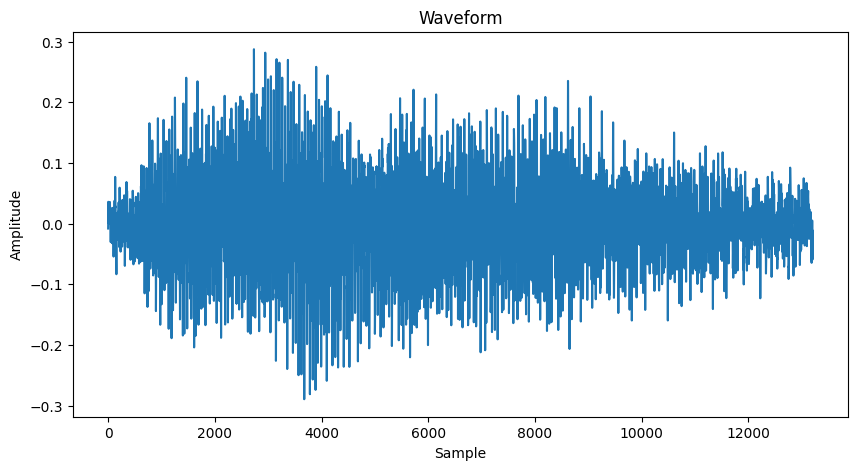

In [ ]:
#Original audio with 1 channel
plt.figure(figsize=(10,5))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(sample)

In [ ]:
wave_sample_rate

96000

In [ ]:
wave_audio

array([[ -539,  -334],
       [ -309,  -114],
       [   -5,    86],
       ...,
       [-1396,  -505],
       [-1095,  -295],
       [ -765,  -254]], dtype=int16)

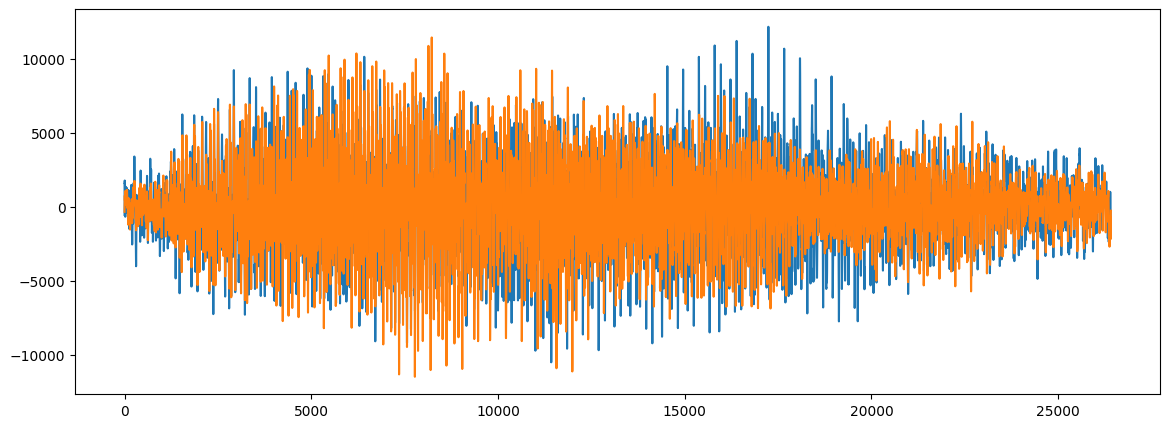

In [ ]:
plt.figure(figsize=(14,5))

plt.plot(wave_audio)
plt.show()

In [ ]:
mfcc1 = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc = 40)
print(mfcc1.shape)

(40, 26)


In [ ]:
mfcc1

array([[-255.52809  , -213.84082  , -201.8358   , ..., -232.81085  ,
        -235.87973  , -238.64888  ],
       [ 129.9325   ,  137.8114   ,  150.75156  , ...,  161.75137  ,
         157.34143  ,  157.79185  ],
       [ -35.77058  ,  -42.39814  ,  -53.70134  , ...,  -41.081207 ,
         -40.868607 ,  -40.659706 ],
       ...,
       [ -14.046196 ,  -12.122574 ,  -11.910574 , ...,  -10.19981  ,
          -9.424987 ,  -10.688988 ],
       [  -0.6772259,   -0.8806406,   -1.3551481, ...,    4.954156 ,
           3.720821 ,    4.4117126],
       [  13.789928 ,   12.092784 ,    9.51317  , ...,   15.400882 ,
          13.964902 ,   18.523417 ]], dtype=float32)

***Data Pre-Processing***

In [ ]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc= 40);
  mfccs_scaled_features = np.mean(mfccs.T, axis=0)

  return mfccs_scaled_features

In [ ]:
metadata = pd.read_csv('/content/UrbanSound8K.csv')


extracted_features = []
for index, row in metadata.iterrows():
  if(row['fold']==8):
    file_path = row['slice_file_name']
    label = row['class']
    data = features_extractor(file_path)
    extracted_features.append([data,label])

extracted_features

In [ ]:
new_df = pd.DataFrame(extracted_features,columns=['feature','class'])
new_df.head()

,feature,class
0,"[-435.79456, 57.867905, -3.187295, -19.904032,...",dog_bark
1,"[-383.38492, 79.30943, -16.650095, -37.682148,...",dog_bark
2,"[-389.08447, 100.16446, -14.591199, -39.996204...",dog_bark
3,"[-103.22346, 97.88686, -51.579346, 13.494537, ...",engine_idling
4,"[-98.08874, 92.564644, -43.509945, 12.335749, ...",engine_idling


In [ ]:
#Splitting the dataset into independent and dependent dataset
X = np.array(new_df['feature'].tolist())
y = np.array(new_df['class'].tolist())

In [ ]:
X.shape

(806, 40)

In [ ]:
#Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(806, 10)

In [ ]:
#Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
X_train.shape

(644, 40)

In [ ]:
X_test.shape

(162, 40)

In [ ]:
y_train.shape

(644, 10)

In [ ]:
y_test.shape

(162, 10)

***Building the Model***

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = y.shape[1]

In [ ]:
model = Sequential()

#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [ ]:
#Training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model.hdf5',verbose=1,save_best_only=True)

start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])

duration = datetime.now()-start
print('Training time =', duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9074074029922485


In [ ]:
#Check the prediction for a random audio
file ="/content/104817-4-0-11.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [ ]:
file ="/content/104817-4-0-11.wav"
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])
prediction_class = labelencoder.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 [==============================] - 0s 31ms/step
Predicted class: drilling
